In [1]:
# Paquete Numpy
import numpy as np

# Generación de números pseudoaleatorios
from numpy import random as rd

# Módulo para las gráficas
from matplotlib import pyplot as plt

# Análisis de datos
import pandas as pd
from pandas import DataFrame as df

<h1 style="background-color:Green;font-size:36pt;color:white">MODELOS DE SIMULACIÓN </h1>

## Universidad Tecnológica La Salle - León, Nicaragua
### Giusseppe Benito Bervis Quintero

# Generador de números pseudoaleatorios (GNPA)

La generación de sucesiones aleatorias reales utilizando algoritmos deterministas es imposible; a lo más, sucesiones **pseudoaleatorias** pueden ser generadas. Estas son, en apariencia, sucesiones aleatorias que en realidad son perfectamente predecibles y que se repiten después de cierta cantidad de ejecuciones. Un generador de números pseudoaleatorios es un algoritmo diseñado para producir una sucesión de números que aparentan ser generados aleatoriamente.

## Pros y contras de los generadores de números aleatorios
Una rutina de generación de números aleatorios debe ser:
<ul>
    <li> Replicable </li>
    <li> Rápida </li>
    <li> No tener saltos grandes entre dos números generados</li>
    <li> Tener un período de generación suficientemente grande (para que no hayan repeticiones en pocas generaciones) </li>
    <li> Generar números con propiedades estadísticas lo más parecido posible a las distribuciones ideales que se quieren generar </li>
</ul>

Los más comunes contras de los generadores de números aleatorios son:
<ul>
    <li> Los números no están uniformemente distribuidos </li>
    <li> Discretización de los números generados </li>
    <li> Media o varianza incorrectas</li>
    <li> Presencia de variaciones cíclicas</li>
</ul>

## Algoritmos de generación de números aleatorios
El primero que trató con los problemas de generación de números aleatorios fue John von Neumann, en 1949. Propuso un método llamado **middle-square**. Este método nos permite entender algunas características importantes del proceso de generación de números aleatorios. Para empezar, necesitamos dar una entrada como una semilla **(seed)** o un valor que inicia la sucesión. Esto es necesario para generar diferentes sucesiones cada vez. Sin embargo, es importante asegurar que el buen desempeño del generador no depende de la semilla usada. A partir de aquí, aparece la primera falla del método del **middle-square**, es decir, al usar el valor cero como
una semilla, solo se obtendrá una secuencia de ceros.

Otro inconveniente de este método es la repetitividad de las sucesiones. Como en todos los generadores de números aleatorios, cada valor depende del valor anterior, y, a lo más, de las variables de estado interno del generador. Dado que se trata de un número limitado de dígitos, la sucesión solo se puede repetir a partir de cierto punto. La longitud de la secuencia, antes de que comience a repetirse, se llama **período**. Un período largo es importante porque muchas aplicaciones prácticas requieren una gran cantidad de datos aleatorios y una secuencia repetitiva puede ser menos efectiva. En tales casos, es importante que la elección de la semilla no influya en los posibles resultados.

Otro aspecto importante es la eficiencia del algoritmo. El tamaño de los valores de los datos de salida y el estado interno y, por lo tanto, la entrada del generador (semilla), a menudo son características intrínsecas del algoritmo y permanecen constantes. Por ello, la eficiencia de un generador de números pseudoaleatorios debe evaluarse no tanto en términos de complejidad computacional, sino en términos de la posibilidad de una implementación rápida y eficiente de las arquitecturas de cálculo disponibles. De hecho, dependiendo de la arquitectura en la que esté trabajando, la elección de diferentes generadores de números pseudoaleatorios o diferentes parámetros de diseño de un determinado de estos algoritmos puede resultar en una implementación más rápida en muchos órdenes de magnitud.

# Explorando métodos genéricos para generar distribuciones aleatorias

La mayoría de lenguajes de programación proveen a los usuarios funciones para generar números pseudoaleatorios con una distribución uniforme en el rango $[0,1]$. Estos generadores son, casi siempre, considerados continuos. Sin embargo, en realidad, son discretos incluso si tienen un paso de discretización muy pequeño. Cualquier secuencia de números pseudoaleatorios puede ser generada a partir de una distribución uniforme de números aleatorios. 

## Método de la transformada inversa
Teniendo un GNPA con distribución uniforme continua en el rango $[0,1]$, es posible generar secuencias continuas con cualquier distribución de probabilidad usando el método de la transformada inversa. Consideramos una variables aleatoria continua, $x$, teniendo una densidad de probabilidad $f(x)$. La correspondiente función de distribución, $F(x)$, es determinado por esta función:
$$F(x) = \int f(x)*dx$$
La función de distribución, $F(x)$, de una variable aleatoria indica la probabilidad de que la variable tome un valor menor o igual que $x$. La expresión analítica (si la hay) de la función inversa se define como $x = F^{-1}(x)$. **La determinación de la muestra de la variable $x$ se obtiene generando un valor entre 0 y 1 y reemplazándolo en la expresión de la función de distribución inversa.**

Es decir, puesto que $F(x)$ está definida en el intervalo $[0,1]$, se puede generar un número aleatorio uniforme $R \in [0,1]$ y tratar de determinar el valor de la variable aleatoria para la cual su distribución acumulada es igual a $R$:
$$F(x) = R \text{ o } x = F^{-1}(R)$$

**BUSCAR IMAGEN**

La dificultad principal de este método descansa en el hecho de que algunas ocasiones es difícil encontrar la transformada inversa. Sin embargo, si esta función inversa ya ha sido encontrada, generando números aleatorios uniformes se podrán obtener valores de la variable aleatoria que sigan la distribución de probabilidad deseada.

Este método se puede utilizar para obtener muestras de muchos tipos de funciones de distribución, como exponencial, uniforme o triangular. Resulta ser el método más intuitivo, pero no el más computacionalmente efectivo. 

## Ejercicio:
Se desea generar números aleatorios que sigan la siguiente distribución de probabilidad:
$$f(x) = \begin{cases} 3x^2 & \text{si } 0 \leq x \leq 1 \\0  & e.o.c \end{cases}$$

**Solución:** La distribución acumulada es
$$F(x) = 3 \int{x^2 dx} = x^3$$
De lo que se tiene que su inversa es:
$$F^{-1}(x) = x^{1/3}$$
para valores de $0 \leq x \leq 1$.

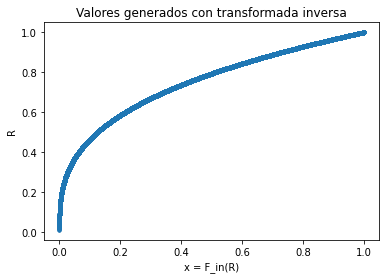

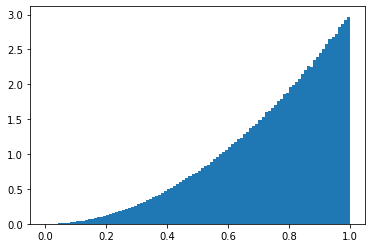

In [41]:
# Definiendo la función inversa
F_inv = lambda x: x**(1/3)

# Generando números aleatorios en el intervalo [0,1]
R = np.random.random(1000000)

# Valuando los números aleatorios en la 
# función inversa
x = F_inv(R)

# Graficando 
plt.plot(R, x, '.')

#Etiquetas
plt.ylabel('R')
plt.xlabel('x = F_in(R)')
plt.title ('Valores generados con transformada inversa')
plt.show()

# Observando el histograma de la distribución 
# de los datos generados con el método
plt.hist(x= x, bins=100, range = (0,1), density=True)

#Etiquetas
plt.ylabel('R')
plt.xlabel('x = F_in(R)')
plt.title ('Histograma - Valores generados con transformada inversa')
plt.show()

## Método de aceptación y rechazo
El método de la transformada inversa está basado en el cálculo de la función inversa, $f^{-1}(x)$, la cual no siempre puede ser calculada (o, por lo menos, no eficientemente). En este caso se puede usar el método de aceptación y rechazo para generar números pseudoaleatorios con determinada distribución de probabilidad sobre un intervalo finito $[a,b]$.

Suponemos que conocemos la función de densidad de probabilidad de una variable aleatoria $X$, es la que intentamos generar: $f_x(x)$. Esta está definida sobre un interbalo finito, $[a,b]$, y su imagen está definida en el intervalo $[0, c]$. En la práctica, se considear que la función $f_x(x)$ está enteramente contenida en el rectángulo $[a,b] \times [0,c]$, como se muestra a continuación:
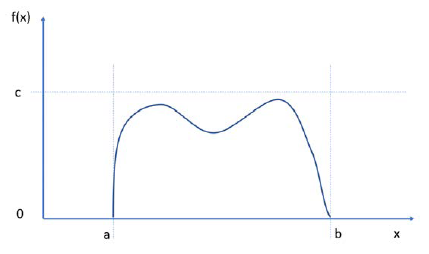

Este método se puede realizar en los siguientes pasos:
<ol>
  <li> Determinar un valor de $c$, de modo que $f_x(x) \leq c, \forall x \in [a,b]$ </li>
  <li> Generar dos números uniformes $U_1 \in [a,b]$ y $U_2 \in [0,c]$ </li>
  <li> Evaluar la función de probabilidad en $U_1$, es decir $f(U_1)$. </li>
  <li> Determinar si se cumple : $$U_2 \leq f(U_1)$$ </li>
  
  <ul>
  <li> Si se sumple, $U_1$ es un valor generador de la variable aleatoria.</li>
  <li> Si no se cumple, se descartan los valores y se retorna al paso 1.</li>
  </ul>
  
</ol>

Nótese que los valores $U_1$ son los valores pseudoaleatorios generados de interés. $U_2$ solo son valores de prueba.

**Ejercicio** Se desea generar número al azar que sigan las siguiente distribución de probabilidad:
$$f(x) = \begin{cases} 2x, & \mbox{si } 0 \leq x \leq 1 \\ 0, & \mbox{en otro caso} \end{cases}$$

El área es 1.00088


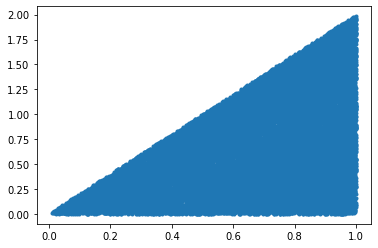

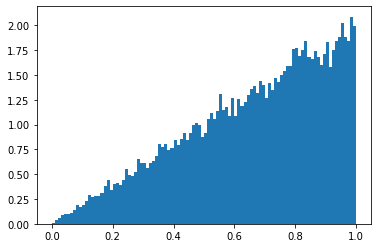

In [51]:
a = 0
b = 1
c = 4


f = lambda x: 2*x

n = 100000

x = []
y = []

cont = 0
for i in range(n):
    U1 = rd.uniform(a,b)
    
    U2 = rd.uniform(0,c)
    
    if U2 < f(U1):
        x.append(U1)
        y.append(U2)
        
        cont += 1
        
        
print(f"El área es {c*cont/n}")

plt.plot(x,y,'.')
plt.show()

plt.hist(x, density = True,  range = (0,1), bins = 100)
plt.show()

# Ejercicios 

Si es posible para los siguientes métodos, cree funciones de Python que le permitan implementar los métodos para cualquier función dada. **Puntos Extras**

## Ejercicio 1. 
Dada la siguiente función, use el método de la transformada inversa para generar números pseudoaleatorios que sigan esa distribución de probabilidad.
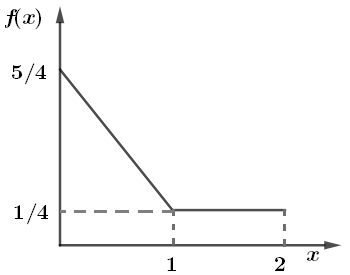

**Solución**
La función de la imagen es
$$f(x) = \begin{cases} -x + \frac{5}{4} & \mbox{si } 0 \leq x \leq 1 \\ \frac{1}{4} & \mbox{si } 1 < x \leq 2\\ 0 & \mbox{en otro caso}\end{cases}$$

Primero hay que encontrar la función integral:
$$F(x) = \begin{cases} \frac{-x^2}{2} + \frac{5x}{4} & \mbox{si } 0 \leq x \leq 1 \\ \frac{x}{4} +0.5 & \mbox{si } 1 < x \leq 2\\ 0 & \mbox{en otro caso}\end{cases}$$


Cuya función inversa es:
$$f^{-1}(x) = \begin{cases} 0 & \mbox{si } x < 0 \\ \frac{5-\sqrt{25-32x}}{4} & \mbox{si } 0 \leq x \leq 0.75 \\ 4x -2  & \mbox{si } 0.75 < x \leq 1\\ 1 & \mbox{si } 1 < x\end{cases}$$

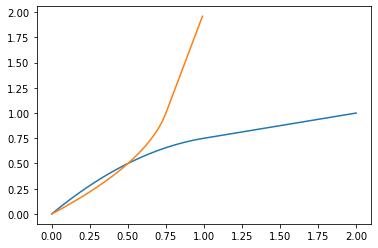

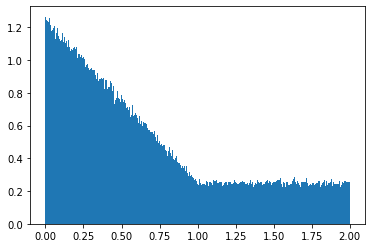

In [125]:
def f(x):
    if 0 <= x and x <= 1:
        return -x**2/2 + 5/4*x
    elif 1 < x and x <= 2:
        return 1/4*x + 0.5
    else:
        return 0

def fi(x):
    if 0 <= x and x <= 0.75:
        return (5 - np.sqrt(25 - 32*x))/4
    elif 0.75 < x and x <= 1:
        return 4*x - 2

# Inputs :
# f es la función
# f_i es la función inversa
# a y b son los extremos del intervalo a generar, inferior y superior respectivamente
# n es el número de valores a generar
def Inverse_Transform(f, f_i, a, b, n):
    
    # El valor de c lo vamos a determinar con el máximo de la función
    c = 0
    puntos = np.linspace(a,b,100)
    for i in range(len(puntos)):
        valor = f(puntos[i])
        if valor > c:
            c = valor
    
    # Números aleatorios uniformes en el intervalo [0,1]
    U1 = rd.uniform(0, 1, n)

    # Valuando los números aleatorios uniformes en la función inversa
    Val_gen = []
    for i in U1:
        Val_gen.append(f_i(i))
    
    return Val_gen
    

    
x = np.linspace(0,2,100)
y1 = []
y2 = []
for i in range(len(x)):
    y1.append(f(x[i]))
    y2.append(fi(x[i]))

plt.plot(x,y1)
plt.plot(x, y2)
plt.show()

a = 0
b = 1

pts = Inverse_Transform(f, fi, a, b, 1000000)
plt.hist(pts, density = True, bins = 1000)
plt.show()

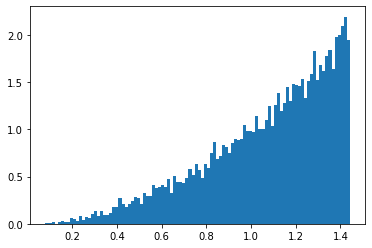

In [77]:
# Inputs :
# f es la función
# f_i es la función inversa
# a y b son los extremos del intervalo a generar, inferior y superior respectivamente
# n es el número de valores a generar
def Inverse_Transform(f, f_i, a, b, n):
    
    # El valor de c lo vamos a determinar con el máximo de la función
    c = 0
    puntos = np.linspace(a,b,100)
    for i in range(len(puntos)):
        valor = f(puntos[i])
        if valor > c:
            c = valor
    
    # Números aleatorios uniformes en el intervalo [0,c]
    U1 = rd.uniform(0, c, n)

    # Valuando los números aleatorios uniformes en la función inversa
    Val_gen = f_i(U1)
    
    return Val_gen


f = lambda x: 3*x**2
fi = lambda x: x**(1/3)
a = 0
b = 1

pts = Inverse_Transform(f, fi, a, b, 10000)
plt.hist(pts, density = True, bins = 100)
plt.show()

## Ejercicio 2. 
Dada la siguiente función, use el método de aceptación y rechazo para generar números pseudoaleatorios que sigan esa distribución de probabilidad.
$$f(x) = \begin{cases} - \frac{8}{5} x + \frac{9}{10}, & \mbox{si } 0 \leq x \leq 0.5 \\
                         \frac{8}{5} x - \frac{7}{10}, & \mbox{si } 0.5 < x \leq 1 \\
                       - \frac{8}{5} x + \frac{5}{2}, & \mbox{si } 1 < x \leq 1.5 \\
                         \frac{8}{5} x - \frac{23}{10}, & \mbox{si } 1.5 < x \leq 2 \\
                                                   0,  & \mbox{en otro caso} \end{cases}$$

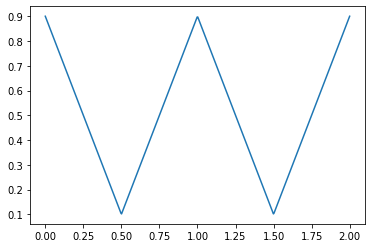

In [62]:
def F(x):
    if x <= 0.25:
        return (9-np.sqrt(81-320*x))/32
    elif 0.25 < x <= 0.5:
        return (7+np.sqrt(320*x-79))/32
    elif 0.5 < x <= 0.75:
        return (25-np.sqrt(241-320*x))/32
    else:
        return (23+np.sqrt(320*x-239))/32
def f(x):
    if x <= 0.5:
        return -(8/5)*x +(9/10)
    elif 0.5 < x <= 1:
        return (8/5)*x -(7/10)
    elif 1 < x <= 1.5:
        return -(8/5)*x + (5/2)
    else:
        return (8/5)*x -(23/10)
    
x = np.linspace(0,2,500)
y = []
for i in range(len(x)):
    y.append(f(x[i]))

plt.plot(x,y)
plt.show()